# Part I - (Prosper Loan Data)
## by Oyedele Samuel

## Introduction
> This is the dataset about loans record with various loan attributes. This data set contains 113,937 loans with 81 variables including loan amount, current loan status, term, prosper score, borrower rate (or interest rate),borrower income, and many others.

> Here is the link to the <a href = "https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0"> data dictionary </a>




## Preliminary Wrangling


In this section, data wrangling (gather, assess, clean) will be perform on the dataset to prepare it for better exploration.

### Gather

In [88]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [89]:
# Load the data into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [90]:
# Perform some programmatic assessments of the dataframe
print(loans.shape)
print(loans.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

In [91]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [92]:
# columns of the dataset
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

#### Subsetting the DataFrame

I want to pick columns needed for the exploration.

In [93]:
loans_sub = loans[['ListingNumber', 'Term', 'LoanStatus', 'BorrowerRate', 'BorrowerState', 'IncomeRange', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment']]

### Assess

In [94]:
# make a copy of the data
loans_clean = loans_sub.copy()

In [95]:
# structure of the data
print(loans_clean.shape)
print(loans_clean.info())

(113937, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
ListingNumber                113937 non-null int64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
BorrowerState                108422 non-null object
IncomeRange                  113937 non-null object
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
DebtToIncomeRatio            105383 non-null float64
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null ob

In [96]:
loans_clean.head()

,ListingNumber,Term,LoanStatus,BorrowerRate,BorrowerState,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,36,Completed,0.1580,CO,"$25,000-49,999",NaN,NaN,0,Other,Self-employed,2.0,True,0.17,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,36,Current,0.0920,CO,"$50,000-74,999",A,7.0,2,Professional,Employed,44.0,False,0.18,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93
2,81716,36,Completed,0.2750,GA,Not displayed,NaN,NaN,0,Other,Not available,NaN,False,0.06,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32
3,658116,36,Current,0.0974,GA,"$25,000-49,999",A,9.0,16,Skilled Labor,Employed,113.0,True,0.15,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,36,Current,0.2085,MN,"$100,000+",D,4.0,2,Executive,Employed,44.0,True,0.26,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97


In [97]:
# checking for null value
loans_clean.isnull().sum()

ListingNumber                    0
Term                             0
LoanStatus                       0
BorrowerRate                     0
BorrowerState                 5515
IncomeRange                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
DebtToIncomeRatio             8554
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanOriginationQuarter           0
MonthlyLoanPayment               0
dtype: int64

In [98]:
# checking for duplicated value
loans_clean.duplicated().sum()

0

In [99]:
# prosper score value counts
loans_clean.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [100]:
# prosper rating alpha value counts
loans_clean['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [101]:
# is borrower home owner value counts
loans_clean.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [102]:
# income range value count
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [103]:
# stated monthly income value counts
loans.StatedMonthlyIncome.value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
5833.333333     2319
6250.000000     2276
2500.000000     2256
4583.333333     2211
6666.666667     2162
2916.666667     1984
8333.333333     1680
4333.333333     1527
7083.333333     1464
7500.000000     1448
3500.000000     1394
0.000000        1394
10000.000000    1282
4000.000000     1260
2083.333333     1256
3000.000000     1218
2666.666667     1110
6000.000000     1051
9166.666667      969
3166.666667      958
4500.000000      870
7916.666667      811
5166.666667      804
4666.666667      760
12500.000000     759
                ... 
3972.666667        1
5103.666667        1
8493.333333        1
8494.083333        1
3350.500000        1
2177.916667        1
6354.250000        1
1805.000000        1
5111.083333        1
3.166667           1
6748.500000        1
5572.000000        1
3212.333333        1
5804.500000        1
8170.666667        1
3512.000000        1
5721.583333  

#### Assessments - Issues

- Missing values in `BorrowerRate`, `ProsperRating (Alpha)`, `ProsperScore`, `Occupation`, `EmploymentStatus`, `EmploymentStatusDuration`, `DebtToIncomeRatio`
- Replace value (True - Homeowner, False - No Homeowner) in `IsBorrowerHomeowner`
- Replace the values of `ListingCategory (numeric) 
- Convert `StatedMonthlyIncome` to nearest whole number
- Extract columns (month, year) from `LoanOriginalDate`
- Convert the data types of `Employment Status`, `ProsperScore`, `ListingCategory (numeric)`, `IsBorrowerHomeowner`
- Rename some unclean variables
- Convert `Loan Status`, `Prosper Score`, `Prosper Score Alpha`, `Loan Original Month`, `Year`, `Income Range` into ordered categorical type

### Issue 1:

Missing values in BorrowerState, ProsperRating (Alpha), ProsperScore, Occupation, EmploymentStatus, EmploymentStatusDuration, DebtToIncomeRatio

#### Code

In [104]:
# filter for rows without null in prosper score
loans_clean = loans_clean[loans_clean.ProsperScore.notnull()]

In [105]:
# filter for rows without null in prosper rating alpha
loans_clean = loans_clean[loans_clean['ProsperRating (Alpha)'].notnull()]

In [106]:
# filter for rows without null in debt to income ratio
loans_clean = loans_clean[loans_clean.DebtToIncomeRatio.notnull()]

In [107]:
# filter for rows without null in employment status duration
loans_clean = loans_clean[loans_clean.EmploymentStatusDuration.notnull()]

In [108]:
# fill occupation with null with none given
loans_clean['Occupation'].fillna('Other', inplace = True)

#### Test

In [109]:
loans_clean.isnull().sum()

ListingNumber                0
Term                         0
LoanStatus                   0
BorrowerRate                 0
BorrowerState                0
IncomeRange                  0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
Occupation                   0
EmploymentStatus             0
EmploymentStatusDuration     0
IsBorrowerHomeowner          0
DebtToIncomeRatio            0
StatedMonthlyIncome          0
LoanOriginalAmount           0
LoanOriginationDate          0
LoanOriginationQuarter       0
MonthlyLoanPayment           0
dtype: int64

### Issue 2:

Replace value (True - Homeowner, False - No Homeowner) in IsBorrowerHomeowner

#### Code

In [110]:
# using pondas replace
loans_clean.IsBorrowerHomeowner = loans_clean.IsBorrowerHomeowner.replace([True, False], ['Homeowner', 'Not Homeowner'])

#### Test

In [111]:
loans_clean.IsBorrowerHomeowner.value_counts()

Homeowner        42058
Not Homeowner    35485
Name: IsBorrowerHomeowner, dtype: int64

### Issue 3

Replace the values of `ListingCategory (numeric)

#### Code

In [112]:
# change the values of listing category (numeric)
Listing_alpha = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 
                 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 
                 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 
                 'Vacation', 'Wedding Loans']
Listing_num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

loans_clean['ListingCategory (numeric)'] = loans_clean['ListingCategory (numeric)'].replace(Listing_num, Listing_alpha)

#### Test

In [113]:
loans_clean['ListingCategory (numeric)'].value_counts()

Debt Consolidation    49708
Other                  8375
Home Improvement       6369
Business               3649
Auto                   2042
Household Expenses     1787
Medical/Dental         1404
Large Purchases         806
Taxes                   788
Wedding Loans           731
Vacation                722
Motorcycle              289
Engagement Ring         201
Student Use             201
Baby&Adoption           191
Boat                     83
Cosmetic Procedure       82
RV                       50
Green Loans              46
Not Available            19
Name: ListingCategory (numeric), dtype: int64

### Issue 4:

Convert StatedMonthlyIncome to nearest whole number

####  Code

In [114]:
loans_clean.StatedMonthlyIncome = loans_clean.StatedMonthlyIncome.round()

#### Test

In [115]:
loans_clean.StatedMonthlyIncome.value_counts()

4167.0     2429
5000.0     2307
3333.0     1916
5833.0     1830
5417.0     1770
6250.0     1652
4583.0     1625
3750.0     1618
6667.0     1612
2500.0     1252
8333.0     1206
2917.0     1196
4333.0     1134
7083.0     1127
7500.0     1122
3500.0      978
10000.0     966
4000.0      859
6000.0      811
9167.0      788
3000.0      724
2667.0      687
3167.0      645
4500.0      642
2083.0      642
7917.0      629
5167.0      621
4667.0      603
4833.0      566
5667.0      541
           ... 
8819.0        1
10842.0       1
15863.0       1
1385.0        1
1484.0        1
17631.0       1
6340.0        1
11564.0       1
4412.0        1
1257.0        1
10875.0       1
6648.0        1
2346.0        1
13807.0       1
10544.0       1
4078.0        1
4414.0        1
3391.0        1
5772.0        1
6547.0        1
1599.0        1
10382.0       1
1962.0        1
8826.0        1
991.0         1
9608.0        1
14998.0       1
8146.0        1
12978.0       1
1543.0        1
Name: StatedMonthlyIncom

### Issue 5:

Extract columns (month, year) from LoanOriginalDate

#### Code

In [116]:
# extract year and month column from loan orgination date
loans_clean['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])

loans_clean['LoanOriginationYear'] = loans_clean['LoanOriginationDate'].dt.year
loans_clean['LoanOriginationMonth'] = loans_clean['LoanOriginationDate'].dt.month_name().str[:3]

In [117]:
# drop loan orgination date
loans_clean.drop(columns='LoanOriginationDate', inplace=True)

#### Test

In [118]:
print(loans_clean.LoanOriginationYear.unique())
print(loans_clean.LoanOriginationMonth.unique())

[2014 2012 2013 2010 2011 2009]
['Mar' 'Nov' 'Sep' 'Dec' 'Apr' 'May' 'Jan' 'Jul' 'Oct' 'Feb' 'Jun' 'Aug']


In [119]:
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 20 columns):
ListingNumber                77543 non-null int64
Term                         77543 non-null int64
LoanStatus                   77543 non-null object
BorrowerRate                 77543 non-null float64
BorrowerState                77543 non-null object
IncomeRange                  77543 non-null object
ProsperRating (Alpha)        77543 non-null object
ProsperScore                 77543 non-null float64
ListingCategory (numeric)    77543 non-null object
Occupation                   77543 non-null object
EmploymentStatus             77543 non-null object
EmploymentStatusDuration     77543 non-null float64
IsBorrowerHomeowner          77543 non-null object
DebtToIncomeRatio            77543 non-null float64
StatedMonthlyIncome          77543 non-null float64
LoanOriginalAmount           77543 non-null int64
LoanOriginationQuarter       77543 non-null object
MonthlyLoanPayment   

### Issue 6:

Convert the data types of `Employment Status`, `Occupation`, `ListingCategory (numeric)`, `IsBorrowerHomeowner`

#### Code

In [120]:
# change data types of some variables
loans_clean['EmploymentStatus'] = loans['EmploymentStatus'].astype('category')
loans_clean['ProsperScore'] = loans_clean['ProsperScore'].astype('int')
loans_clean['ListingCategory (numeric)'] = loans_clean['ListingCategory (numeric)'].astype('category')
loans_clean['IsBorrowerHomeowner'] = loans_clean['IsBorrowerHomeowner'].astype('category')
loans_clean['LoanOriginationQuarter'] = loans_clean['LoanOriginationQuarter'].astype('category')

In [121]:
# Test
loans_clean.dtypes

ListingNumber                   int64
Term                            int64
LoanStatus                     object
BorrowerRate                  float64
BorrowerState                  object
IncomeRange                    object
ProsperRating (Alpha)          object
ProsperScore                    int64
ListingCategory (numeric)    category
Occupation                     object
EmploymentStatus             category
EmploymentStatusDuration      float64
IsBorrowerHomeowner          category
DebtToIncomeRatio             float64
StatedMonthlyIncome           float64
LoanOriginalAmount              int64
LoanOriginationQuarter       category
MonthlyLoanPayment            float64
LoanOriginationYear             int64
LoanOriginationMonth           object
dtype: object

### Issue 7:

Rename some unclean variables

#### Code

In [122]:
# rename some unclean variable names
loans_clean.rename(columns = {'ProsperRating (numeric)':'ProsperRatingNumeric', 'ProsperRating (Alpha)':'ProsperRatingAlpha', 'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

#### Test

In [123]:
loans_clean.columns

Index(['ListingNumber', 'Term', 'LoanStatus', 'BorrowerRate', 'BorrowerState',
       'IncomeRange', 'ProsperRatingAlpha', 'ProsperScore', 'ListingCategory',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'LoanOriginationQuarter', 'MonthlyLoanPayment',
       'LoanOriginationYear', 'LoanOriginationMonth'],
      dtype='object')

### Issue 8:

Convert Loan Status, Prosper Score, Prosper Score Alpha, Loan Original Month, Year, Income Range into ordered categorical type

#### Code

In [124]:
# convert Loan Status, Prosper Score, Prosper Score Alpha, Loan Original Month, Year, Income Range into ordered categorical types
ordinal_var_dict = {'LoanStatus' : ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 
                    'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 
                    'Past Due (91-120 days)', 'Past Due (>120 days)'], 'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'ProsperRatingAlpha': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA' ],
                    'LoanOriginationMonth': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    'LoanOriginationYear': [2009, 2010, 2011, 2012, 2013, 2014],
                    'IncomeRange':['Not employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loans_clean[var] = loans_clean[var].astype(ordered_var)

#### Test

In [125]:
loans_clean.dtypes

ListingNumber                  int64
Term                           int64
LoanStatus                  category
BorrowerRate                 float64
BorrowerState                 object
IncomeRange                 category
ProsperRatingAlpha          category
ProsperScore                category
ListingCategory             category
Occupation                    object
EmploymentStatus            category
EmploymentStatusDuration     float64
IsBorrowerHomeowner         category
DebtToIncomeRatio            float64
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
LoanOriginationQuarter      category
MonthlyLoanPayment           float64
LoanOriginationYear         category
LoanOriginationMonth        category
dtype: object

### Overview of the Clean Loan Data

In [126]:
print('Dimension of the datset:', loans_clean.shape)
print(loans_clean.info())
print(loans_clean.head(3))

Dimension of the datset: (77543, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 20 columns):
ListingNumber               77543 non-null int64
Term                        77543 non-null int64
LoanStatus                  77543 non-null category
BorrowerRate                77543 non-null float64
BorrowerState               77543 non-null object
IncomeRange                 77543 non-null category
ProsperRatingAlpha          77543 non-null category
ProsperScore                77543 non-null category
ListingCategory             77543 non-null category
Occupation                  77543 non-null object
EmploymentStatus            77543 non-null category
EmploymentStatusDuration    77543 non-null float64
IsBorrowerHomeowner         77543 non-null category
DebtToIncomeRatio           77543 non-null float64
StatedMonthlyIncome         77543 non-null float64
LoanOriginalAmount          77543 non-null int64
LoanOriginationQuarter      77543 non-

In [127]:
# descriptive statistics for numeric variables
loans_clean.describe()

,ListingNumber,Term,BorrowerRate,EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,7.754300e+04,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000
mean,7.787228e+05,42.724630,0.193408,104.240757,0.258739,5963.475646,9269.504688,295.759460
std,2.357751e+05,11.712344,0.073898,96.790960,0.318347,5082.340437,6398.196398,189.326004
min,4.162750e+05,12.000000,0.040000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,5.626475e+05,36.000000,0.134900,31.000000,0.150000,3533.000000,4000.000000,158.490000
50%,7.508730e+05,36.000000,0.184500,75.000000,0.220000,5000.000000,8000.000000,256.390000
75%,9.833660e+05,60.000000,0.252400,149.000000,0.320000,7167.000000,14500.000000,392.280000
max,1.255149e+06,60.000000,0.360000,755.000000,10.010000,483333.000000,35000.000000,2251.510000


In [128]:
# saving the clean data to a csv file
loans_clean.to_csv('LoanData.csv')

In [129]:
loans_clean.shape

(77543, 20)

### What is the structure of your dataset?

> There are 77,543 loans in the dataset with 20 variables. Most variables are numeric in nature. but variables Loan Status, Prosper Score, Prosper Score Alpha, Loan Original Month, Year, Income Range are categorical ordered variables from with this following levels

> (low) - (high)

> LoanStatus : Chargedoff, Completed, Defaulted, FinalPaymentInProgress, Past Due (1-15 days), Past Due (16-30 days), Past Due (31-60 days), Past Due (61-90 days), Past Due (91-120 days), Past Due (>120 days)

> ProsperScore: 1,2,3,4,5,6,7,8,9,10.11

> ProsperRatingAlpha: HR, E, D, C, B, A, AA

> LoanOriginationMonth: Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec

> LoanOriginationYear: 2009, 2010, 2011, 2012, 2013, 2014

> IncomeRange: Not employed, $1-24,999, $25,000-49,999, $50,000-74,999, $75,000 99,999, $100,000+


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out what features are best for predicting the loan amounts for each borrowers in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that income range will have strongest effect on each loans: the higher the income, the higher the loan. I also think that other variables: prosper score, monthly loan payment, employment status, is borrower home owner, stated monthly income, borrower rate and listing category, will have effects on the loan.

## Univariate Exploration

> In this section, investigate distributions of individual variables.


### Question 1:

Firstly, I will be looking at the distribution of the main variable of interest: LoanOriginalAmount

### Visualization

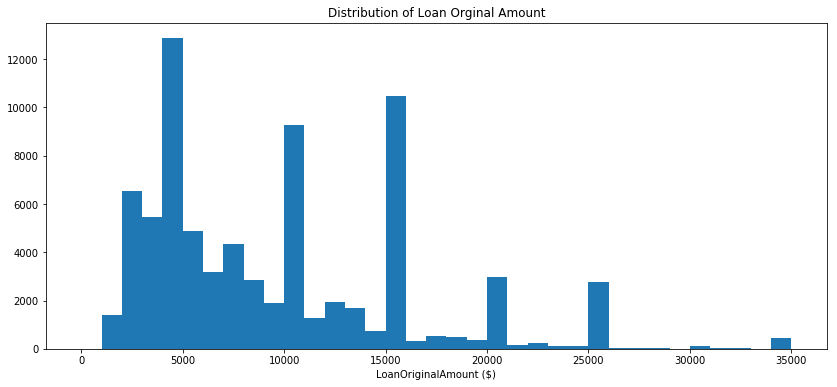

In [131]:
# create a standard histogram plot
binsize = 1000
bins = np.arange(0, loans_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[14,6])
plt.hist(data = loans_clean, x = 'LoanOriginalAmount', bins=bins)
plt.title('Distribution of Loan Orginal Amount')
plt.xlabel('LoanOriginalAmount ($)')
plt.show()

Observation: The loan amount distribution is trimodal, with one peak at 5000, second peak at 10000, and third peak at 15000. There's a low decrease in frequency of loan amount after 25000.

### Question 2

Let's look at the first predictor variable of intrest: income range

### Visualization

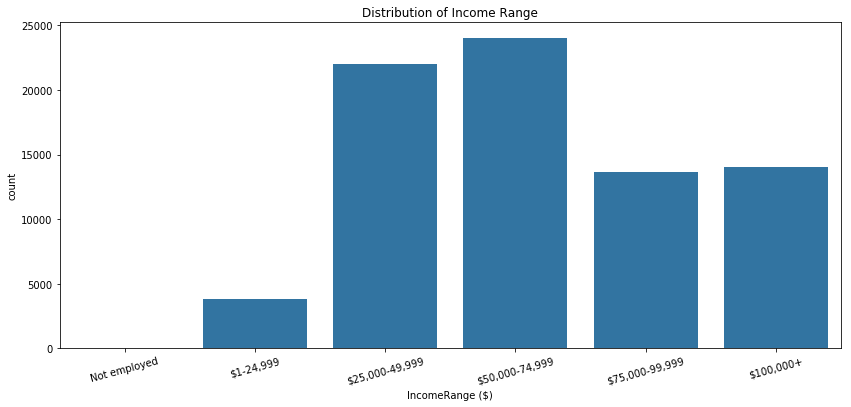

In [133]:
# plotting using seaborn bar plot

plt.figure(figsize=[14,6])
base_color = sb.color_palette()[0]
sb.countplot(data = loans_clean, x = 'IncomeRange', color = base_color)
plt.title('Distribution of Income Range')
plt.xlabel('IncomeRange ($)')
plt.xticks(rotation = 15)
plt.show()

Observation: The income range distribution is bimodal, with one peak at (25,000 - 49,999) and, other peak at (50,000 - 74,999). People with no income tend to have the no loans

### Question 3

Let's look at the second predictor variable of intrest: debt to income ratio

### Visualization

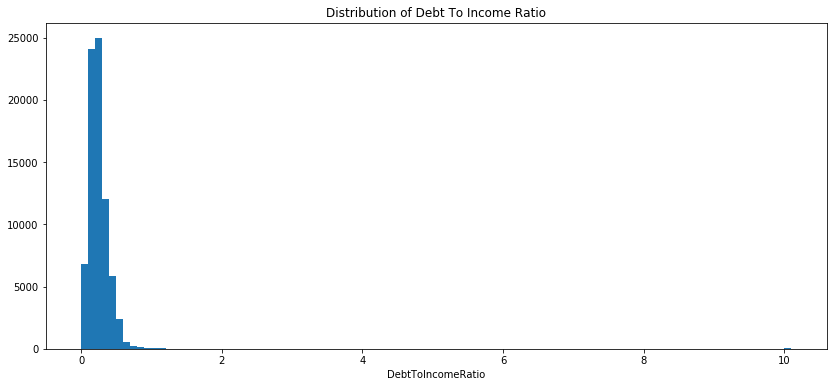

In [134]:
# plotting on a standard plot
binsize = 0.1
bins = np.arange(0, loans_clean.DebtToIncomeRatio.max()+binsize, binsize)

plt.figure(figsize=[14,6])
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins=bins)
plt.title('Distribution of Debt To Income Ratio')
plt.xlabel('DebtToIncomeRatio')
plt.show()

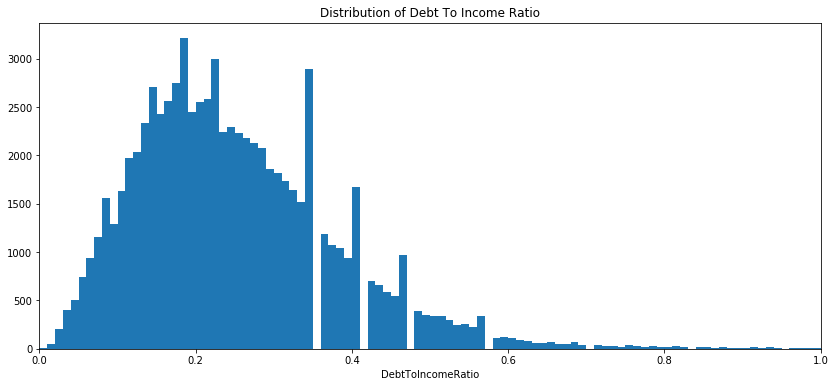

In [135]:
# investigating further on a smaller bin size
binsize = 0.01
bins = np.arange(0, loans_clean.DebtToIncomeRatio.max()+binsize, binsize)

plt.figure(figsize=[14,6])
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins=bins)
plt.title('Distribution of Debt To Income Ratio')
plt.xlabel('DebtToIncomeRatio')
plt.xlim(0,1)
plt.show()

Observation: From the distribution above, loan lenders tend to give more loans to borrowers with low debt income ratio (< 0.36). There's large spikes in frequency from range (0 - 0.36).

### Question 4

How is the distribution of StatedMonthlyIncome?

### Visualization

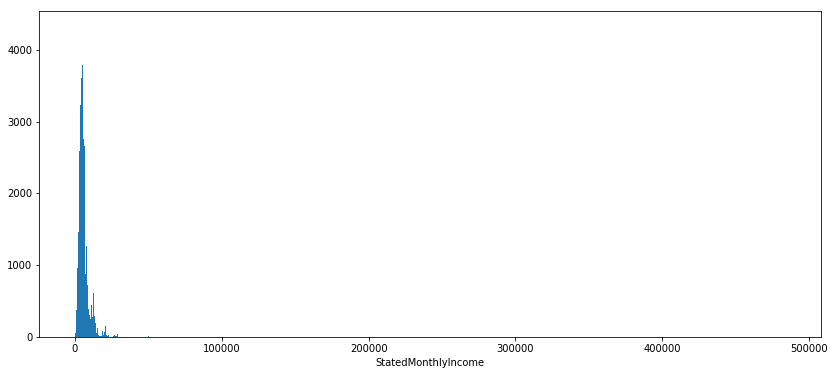

In [138]:
# plotting on a standard scale plot
binsize = 250
bins = np.arange(0, loans_clean.StatedMonthlyIncome.max()+binsize, binsize)
plt.figure(figsize=[14,6])
plt.hist(data = loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome')
plt.show()

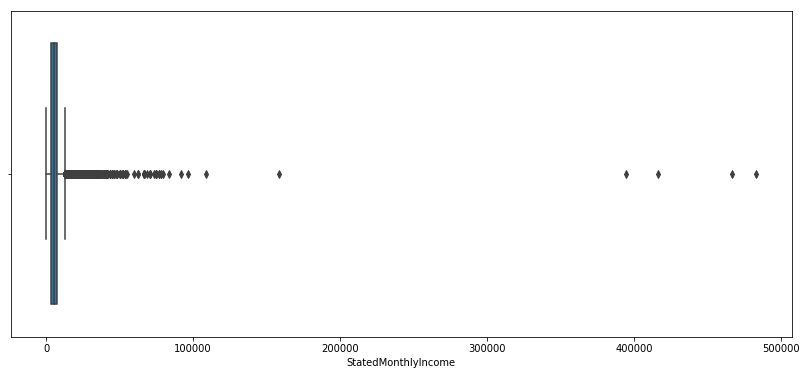

In [139]:
# investigating the variable using seaborn box plot

plt.figure(figsize = [14,6])
sb.boxplot(data = loans_clean, x = 'StatedMonthlyIncome')

From thd distribution over, there is outliers in the data. we will be investigating the data 

In [140]:
Q3 = loans_clean.StatedMonthlyIncome.quantile(0.75)
Q1 = loans_clean.StatedMonthlyIncome.quantile(0.25)
IQR = Q3 - Q1
lowerlimit = Q1 - 1.5*IQR # data that fall below this limit is an outlier
upperlimit = Q3 + 1.5*IQR # data that fall above this limit is an outlier
print(lowerlimit, upperlimit)

-1918.0 12618.0


In [141]:
print('The shape before removing the outlier', loans_clean.shape)

The shape before removing the outlier (77543, 20)


In [142]:
# filter out the outliers
loans_clean = loans_clean.loc[loans_clean.StatedMonthlyIncome < upperlimit]

In [143]:
print('The shape after removing the outlier', loans_clean.shape)

The shape after removing the outlier (74035, 20)


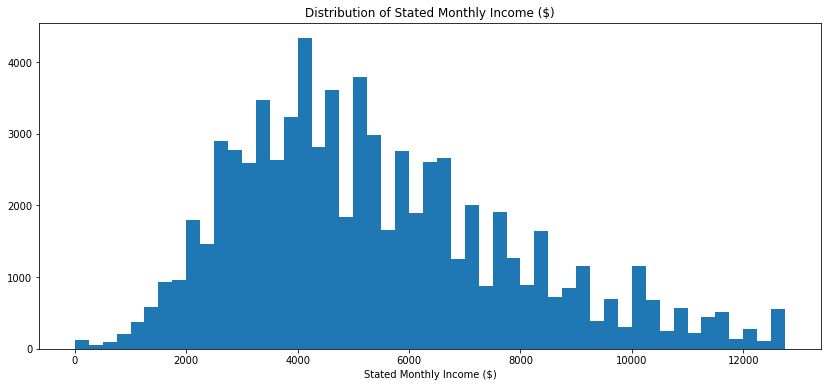

In [145]:
# plotting on a standard scale plot after removing the outliers
binsize = 250
bins = np.arange(0, loans_clean.StatedMonthlyIncome.max()+binsize, binsize)

plt.figure(figsize = [14,6])
plt.hist(data = loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.title('Distribution of Stated Monthly Income ($)')
plt.xlabel('Stated Monthly Income ($)')
plt.show()

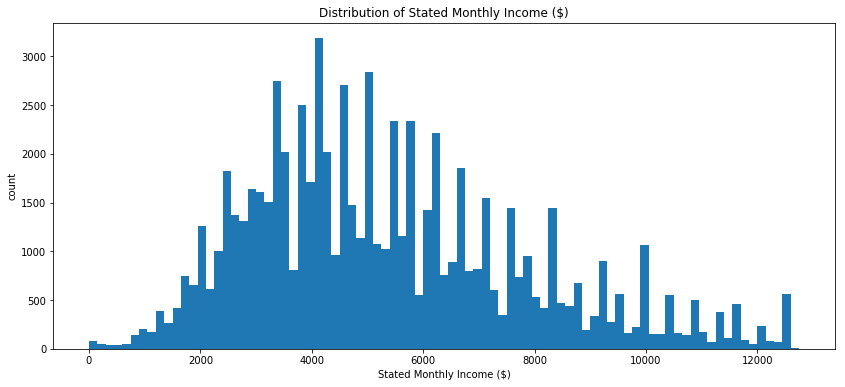

In [146]:
# investigating further on a smaller bin size
binsize = 150
bins = np.arange(0, loans_clean.StatedMonthlyIncome.max()+binsize, binsize)

plt.figure(figsize = [14,6])
plt.hist(data = loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.title('Distribution of Stated Monthly Income ($)')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.show()

Observation: After removing the outliers, they are high spikes in frequency at 4000, 4500, 5000 stated monthly income. High stated monthly income from 10,000 tend to have low count of loans given.

### Question 5

Let's take a look at other ordinal categorical variables: prosper alpha rating, prosper score, loan origination year, month

### Visualization

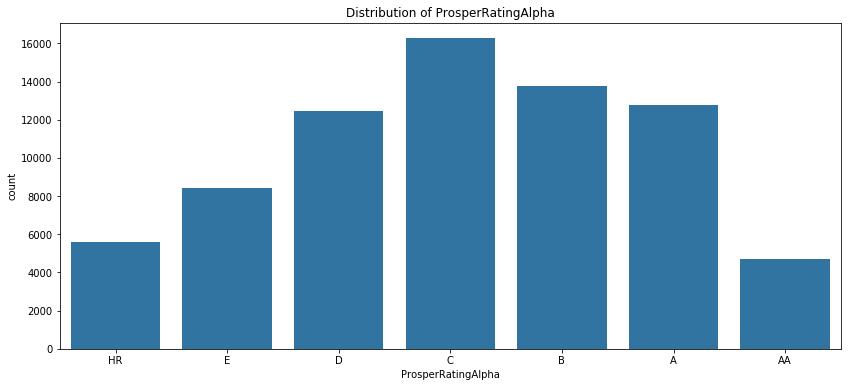

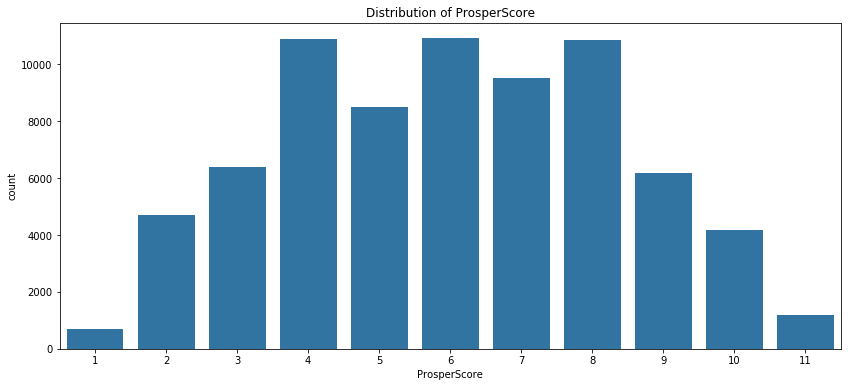

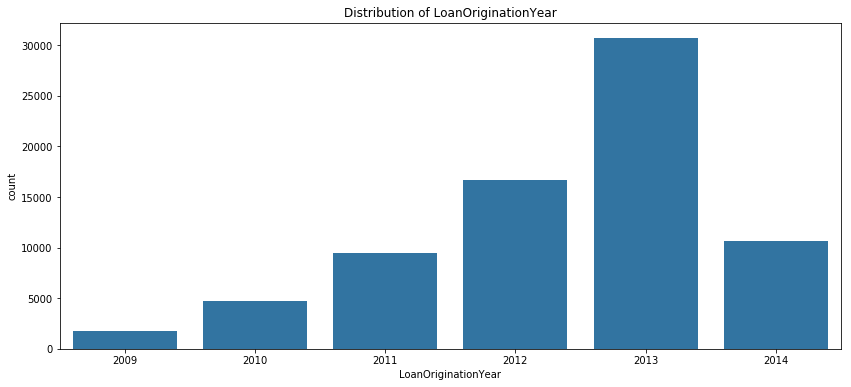

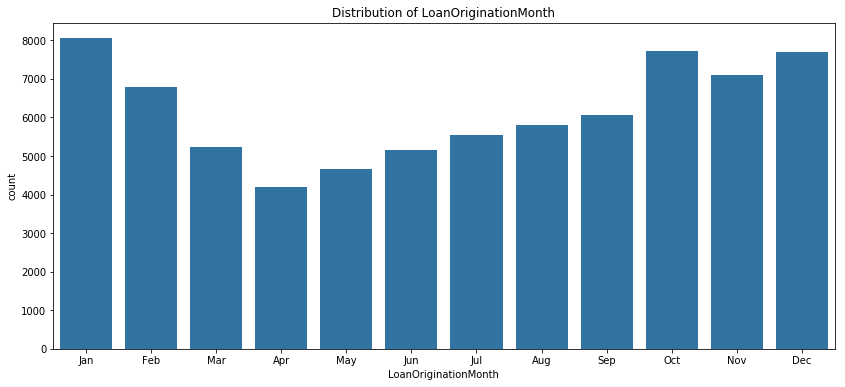

In [147]:
# plotting the four ordinal variables together using function
def ordered_bar(x):
    base_color = sb.color_palette()[0]
    fig, ax = plt.subplots(figsize=[14,6])
    ax = sb.countplot(data = loans_clean, x = x, color = base_color)
    plt.title('Distribution of {}'.format(x))
    plt.xlabel(x)
    return fig

# re-using code to prosper alpha rating, prosper score, loan origination year, month
ordered_bar('ProsperRatingAlpha')

ordered_bar('ProsperScore')

ordered_bar('LoanOriginationYear')

ordered_bar('LoanOriginationMonth');

Observation: Prosper Rating `C` has the highest frequency of loans. There's a decrease in the prosper rating frequency of loans after a peak at `C`. Prosper score distribution is trimodal where most loans fall at the 4, 6, 8 risk scores. 2013 is the year with the most frequency of loans while Jan is the month with most frequency of loans.

### Question 6

How is the distribution of employment status?

### Visualization

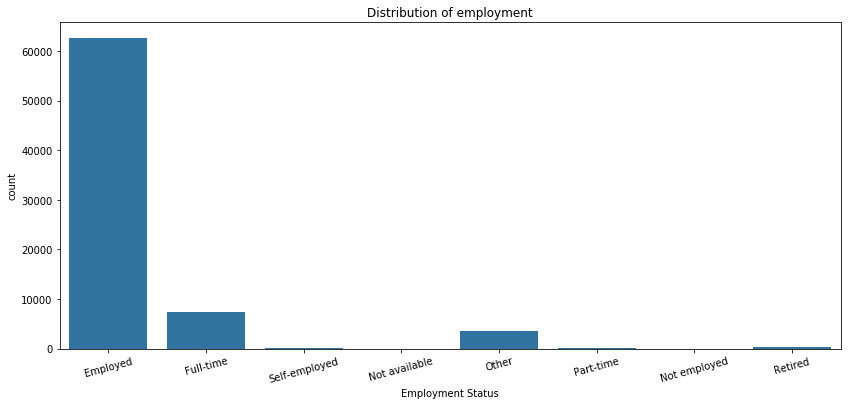

In [148]:
# plotting using seaborn plot

base_order = loans.EmploymentStatus.value_counts().index

plt.figure(figsize = [14,6])
sb.countplot(data = loans_clean, x = 'EmploymentStatus', color = base_color, order = base_order)
plt.title('Distribution of employment')
plt.xlabel('Employment Status')
plt.xticks(rotation = 15)
plt.show()

Observation: From the distribution, Employed people tend to get the most loans compared to other categories. I will be getting more insights on this in bivariate / multvariate exploration.

### Question 7

How is the distribution of loan status?

### Visualization

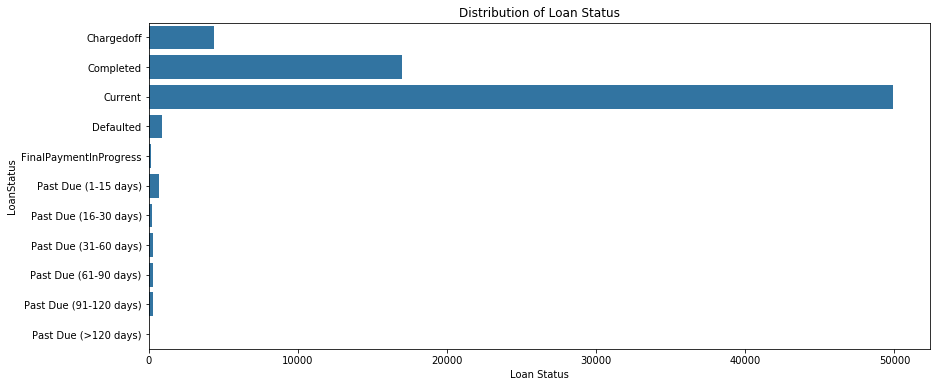

In [153]:
# plotting using seaborn plot

plt.figure(figsize = [14,6])
sb.countplot(data = loans_clean, y = 'LoanStatus', color = base_color)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.show()

Observation: From this distribution, most of the loans are still on current status. less than 20,000 loans have been completed.

### Question 8

How is the distribution of borrower home owner or not?

### Visualization

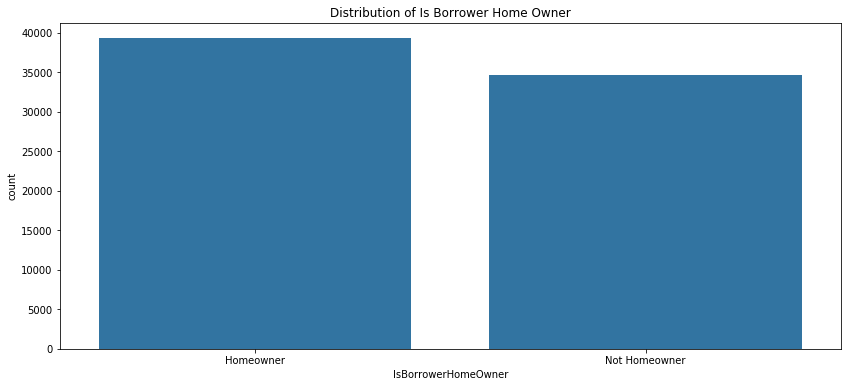

In [154]:
# plotting using seaborn plot

plt.figure(figsize = [14,6])
sb.countplot(data = loans_clean, x = 'IsBorrowerHomeowner', color = base_color)
plt.title('Distribution of Is Borrower Home Owner')
plt.xlabel('IsBorrowerHomeOwner')
plt.show()

Observation: Over 60% of loans given to borrower are home owner.

### Question 9

How is the distribution of term?

### Visualization

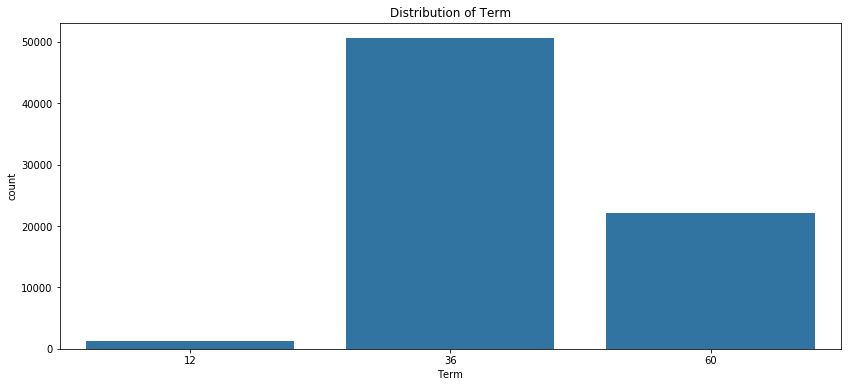

In [155]:
# plotting using seaborn plot

plt.figure(figsize = [14,6])
sb.countplot(data = loans_clean, x = 'Term', color = base_color)
plt.title('Distribution of Term')
plt.xlabel('Term')
plt.show()

Observation: More loans are given in 36 term (3years).

### Question 10

How is the distribution of listing category?

### Visualization

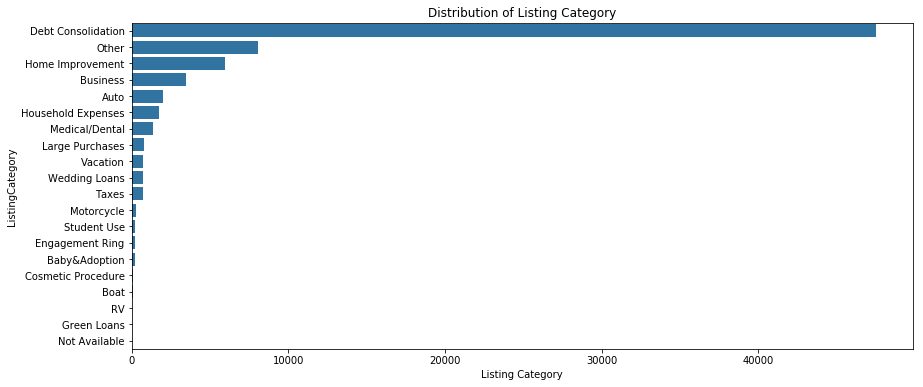

In [157]:
# plotting using seaborn plot

base_order = loans_clean.ListingCategory.value_counts().index

plt.figure(figsize = [14,6])
sb.countplot(data = loans_clean, y = 'ListingCategory', color = base_color, order = base_order)
plt.title('Distribution of Listing Category')
plt.xlabel('Listing Category')
plt.show()

Obervation: Most loans are collected based on debt consolidation which is 4x other listing category. This implies that most borrowers collect loans to pay up their debts.

### Question 11

I'll look at other features in the data to see if there's interesting properties from them

### Visualization

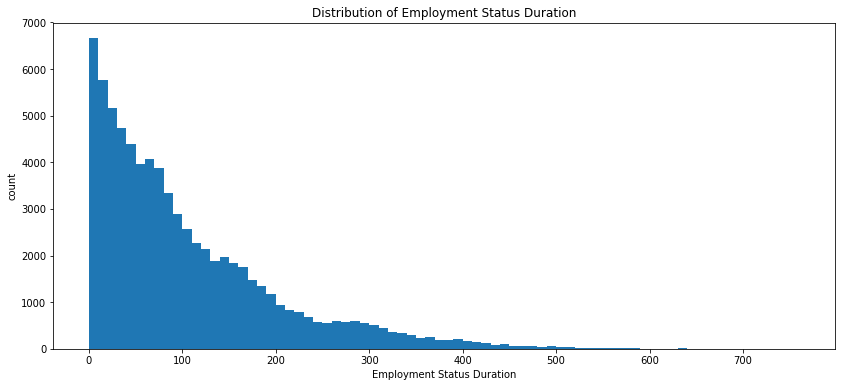

In [194]:
# distribution of employment status duration

binsize = 10
bins = np.arange(0, loans_clean.EmploymentStatusDuration.max()+binsize, binsize)

plt.figure(figsize = [14,6])
plt.hist(data = loans_clean, x = 'EmploymentStatusDuration', bins = bins)
plt.title('Distribution of Employment Status Duration')
plt.xlabel('Employment Status Duration')
plt.ylabel('count')
plt.show()

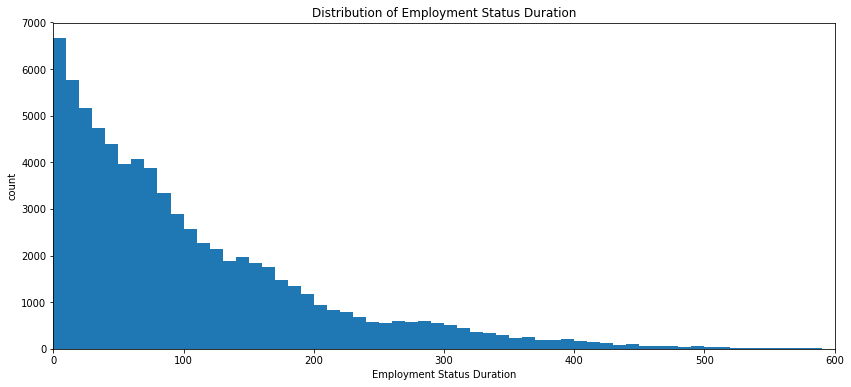

In [196]:
# investigating further by adding axis limit

binsize = 10
bins = np.arange(0, loans_clean.EmploymentStatusDuration.max()+binsize, binsize)

plt.figure(figsize = [14,6])
plt.hist(data = loans_clean, x = 'EmploymentStatusDuration', bins = bins)
plt.title('Distribution of Employment Status Duration')
plt.xlabel('Employment Status Duration')
plt.ylabel('count')
plt.xlim(0,600)
plt.show()

Observation: The distributions is unimodal. Employment Status Duration is skewed right and there is a high count of loans at 0 duration.

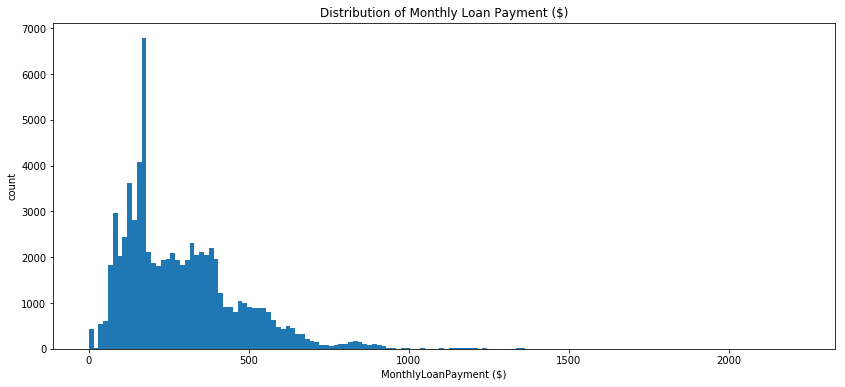

In [214]:
# distribution of monthly loan payment
binsize = 15
bins = np.arange(0, loans_clean.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize = [14,6])
plt.hist(data = loans_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.title('Distribution of Monthly Loan Payment ($)')
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('count')
plt.show()

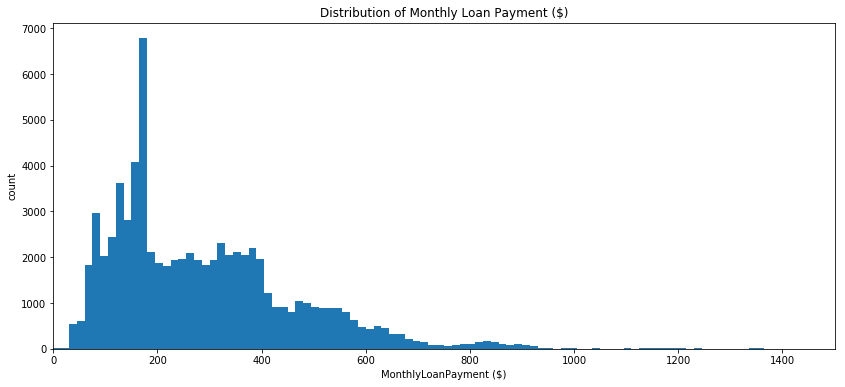

In [215]:
# Investigating the variable

binsize = 15
bins = np.arange(0, loans_clean.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize = [14,6])
plt.hist(data = loans_clean[loans_clean.MonthlyLoanPayment != 0], x = 'MonthlyLoanPayment', bins = bins)
plt.title('Distribution of Monthly Loan Payment ($)')
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('count')
plt.xlim(0,1500)
plt.show()

Observation: The distribution is unimodal. Monthly Loan Payment is slightly skewed right. Lots of loans are below 500 monthly payment.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The loan original amount distribution is trimodal, with one peak at 5000, second peak at 10000, and third peak at 15000. in income range distribution, people with no income tend to have no loans.

> Loan orgination year: There is increase in the frequency of loans from 2009 - 2013. Highest loans are issued out in 2013.

> loan lenders tend to give more loans to borrowers with low debt income ratio (< 0.36). Most loans are given in 36 term (3 years)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the stated monthly income, a number of outlier points were identified using box plot. Outliers fall below the lower quartile and above the upper quartile. For better exploration, the outliers are removed after performing quantiles on the variable where data are selected based on points below the upper limit.

## Bivariate Exploration

In this section, explorations will be performed on two variables to determined their relationships.

### Question 12

Let's look at correlations present between features in the data

### Visualization

In [216]:
numeric_vars = ['LoanOriginalAmount', 'Term', 'EmploymentStatusDuration', 'MonthlyLoanPayment', 'DebtToIncomeRatio', 'StatedMonthlyIncome' ]
categoric_vars = ['IncomeRange', 'ProsperScore', 'ProsperRatingAlpha' 'LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'LoanOriginationYear' ]

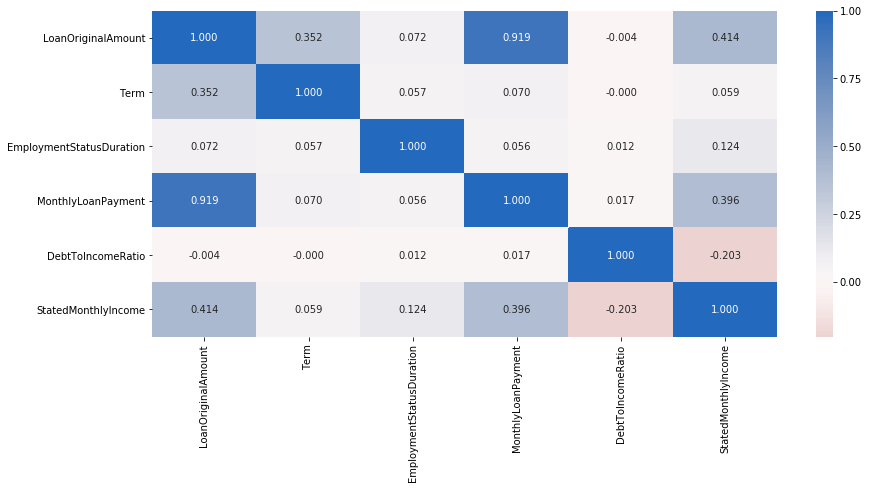

In [218]:
# correlation plot
plt.figure(figsize = [14,6])
sb.heatmap(loans_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Observation: 
- There is a strong relationship between the LoanOrginalAmount and MonthlyLoanPayment (0.919)
- There is a weak postive relationship between LoanOrginalAmount and Term (0.352)
- There is a weak postive relationship between LoanOrginalAmount and StatedMonthlyIncome (0.414)
- There is a weak postive relationship between MonthlyLoanPayment and StatedMonthlyIncome (0.396)
- There is a weak negative relationship between DebtToIncomeRatio and LoanOrginalAmount (-0.004)

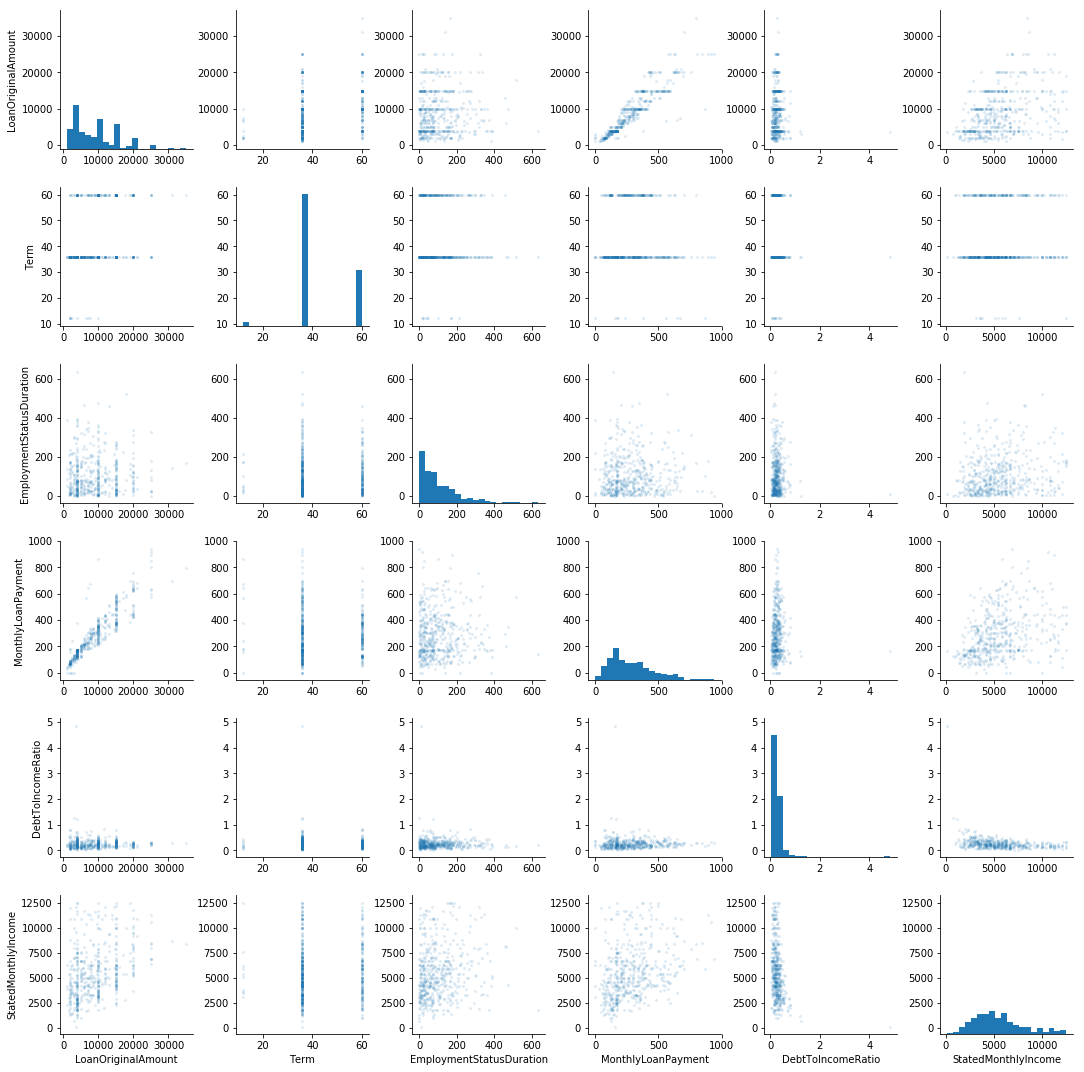

In [219]:
# plot matrix: sample 500 loans so that plots for better exploration
loan_sample = loans_clean.sample(n=500, replace = False)

g = sb.PairGrid(data = loan_sample, vars = numeric_vars)
g.map_offdiag(plt.scatter, alpha = 1/10, s = 4)
g.map_diag(plt.hist, bins = 20);

As expected, loan orginal amount and monthly loan payment have a strong correlation. Monthly loan payment and stated monthly income have a weak correlation. Loan orginal amount and employment status duration have a weak correlation, this may be due to the high volume of loans given to unemployed people.

### Question 13

Let's look at how loan original amount and monthly loan payment correlate with categorical variables.

### Visualization

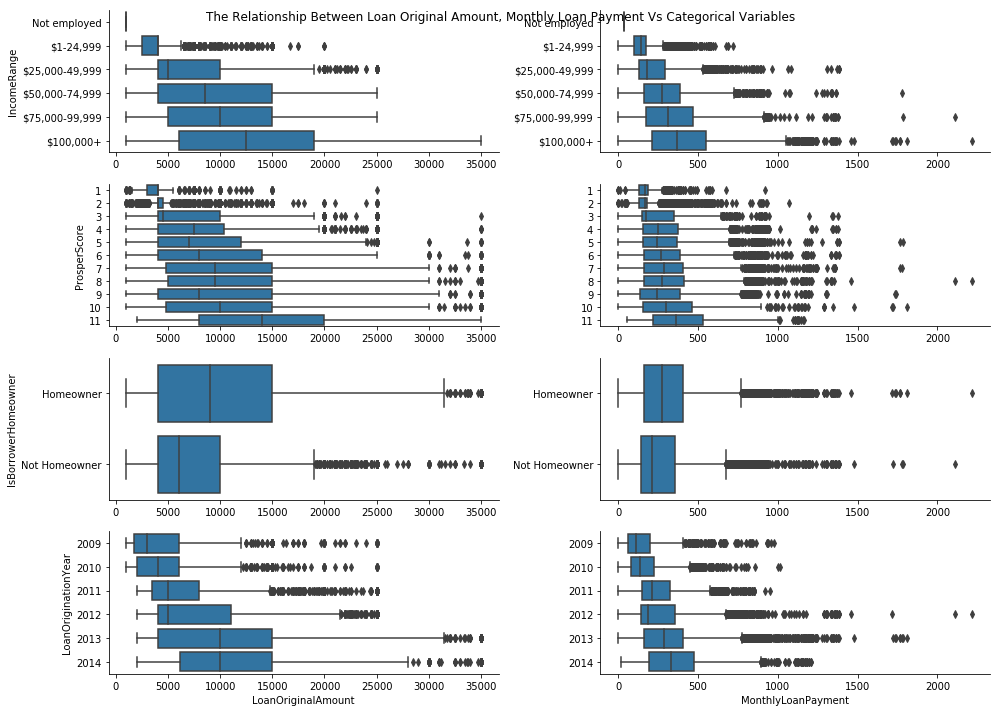

In [220]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loans_clean, x_vars = ['LoanOriginalAmount', 'MonthlyLoanPayment'], y_vars = ['IncomeRange', 'ProsperScore', 
    'IsBorrowerHomeowner', 'LoanOriginationYear'])
g.map(boxgrid)
plt.suptitle('The relationship between loan original amount, monthly loan payment vs categorical variables'.title())
# Set Plot DImensions - Figure Level
g.fig.set_size_inches(14, 10);
plt.tight_layout()
plt.show();

Observation: They are some postive relationship between the categorical variables and the numerical variable. The average loan orginal amounts tend to increase yearly. Highest income range tend to have the highest average loan orginal amount and monthly loan payment.

### Question 14

Let's look at the relationship between three categorical features

### Visualization

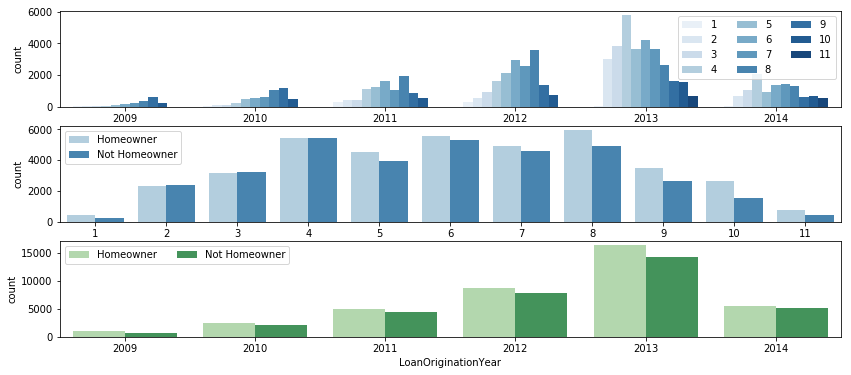

In [221]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [14,6])

# subplot 1: LoanOriginationYear vs ProsperScore
ax = plt.subplot(3, 1, 1)
sb.countplot(data = loans_clean, x = 'LoanOriginationYear', hue = 'ProsperScore', palette = 'Blues')
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 2: ProsperScore vs IsBorrowerHomeowner
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans_clean, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(loc = 'upper left') # re-arrange legend to reduce overlapping

# subplot 3: LoanOriginationYear vs IsBorrowerHomeowner use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loans_clean, x = 'LoanOriginationYear', hue = 'IsBorrowerHomeowner', palette = 'Greens')
ax.legend(loc = 'upper left', ncol = 2) # re-arrange legend to remove overlapping

plt.show()

Observation: There is increase in homeowner and not homeowner loans through the years (2009 - 2013). There doesn't seem to be that much interaction between loan orgination year and prosper score but there is increase in large spikes over the years and fewer loans given at the best prosper score (11) across the years. It looks there are low homeowner and not homeowner at the best (lowest risk) prosper score 11.

### Question 15

Let's look at the relationship between loan orginal amount and income range.

### Visualization

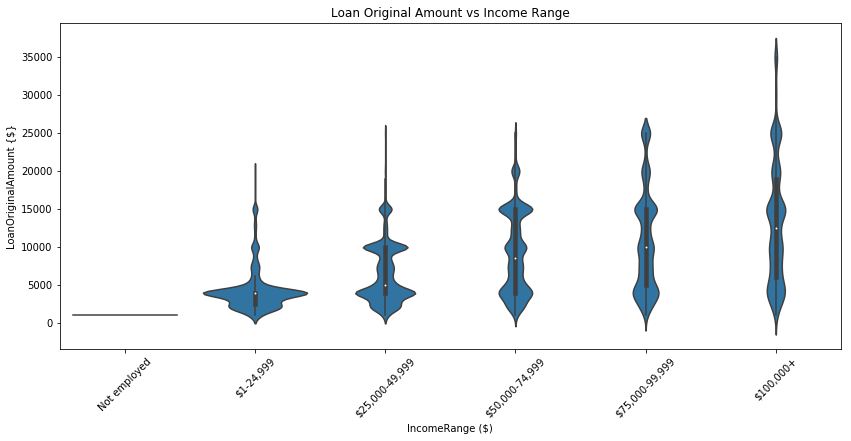

In [222]:
# violin plot of loan original amount vs income ramge
plt.figure(figsize = [14,6])
sb.violinplot(data = loans_clean, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.title('Loan Original Amount vs Income Range')
plt.xlabel('IncomeRange ($)')
plt.ylabel('LoanOriginalAmount {$}')
plt.xticks(rotation = 45)
plt.show();

Observation: From the plot above, the higher the income range, the higher the loan amounts given.

### Question 16

Let's look at the relationship between loan orginal amount and monthly loan payment.

### Visualization

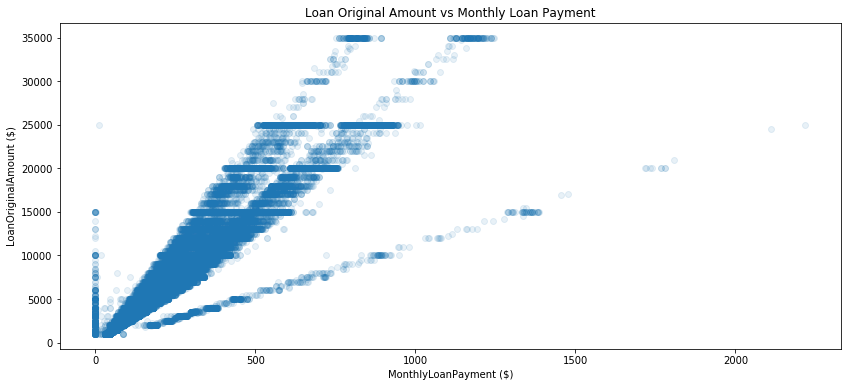

In [227]:
# scatter plot of loan original amount vs monthly loan payment
plt.figure(figsize = [14,6])
sb.regplot(data = loans_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', fit_reg = False, x_jitter = 0.3, scatter_kws = {'alpha' : 1/10})
plt.title('Loan Original Amount vs Monthly Loan Payment')
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('LoanOriginalAmount ($)')
plt.show();

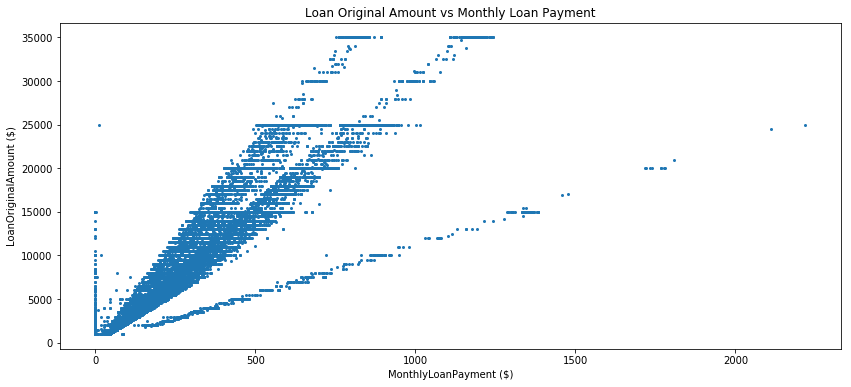

In [230]:
# investigating further

plt.figure(figsize = [14,6])
plt.scatter(data = loans_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', s=4)
plt.title('Loan Original Amount vs Monthly Loan Payment')
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('LoanOriginalAmount ($)')
plt.show();

Observation: There is a strong relationship between them.The higher the loan amount, the higher the monthly loan payment. The plot seem to be divided. It may be due to the categorical variable. We look more on that later.

### Question 17

Let's look at the relationship between loan orginal amount and debt to income ratio.

### Visualization

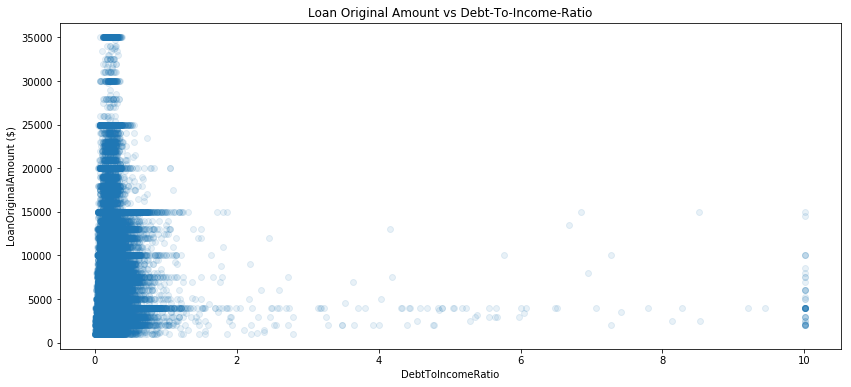

In [231]:
# scatter plot of loan original amount vs debt to income ratio
plt.figure(figsize = [14,6])
plt.scatter(data = loans_clean, x = 'DebtToIncomeRatio', y = 'LoanOriginalAmount', alpha = 1/10)
plt.title('Loan Original Amount vs Debt-To-Income-Ratio')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('LoanOriginalAmount ($)')
plt.show();

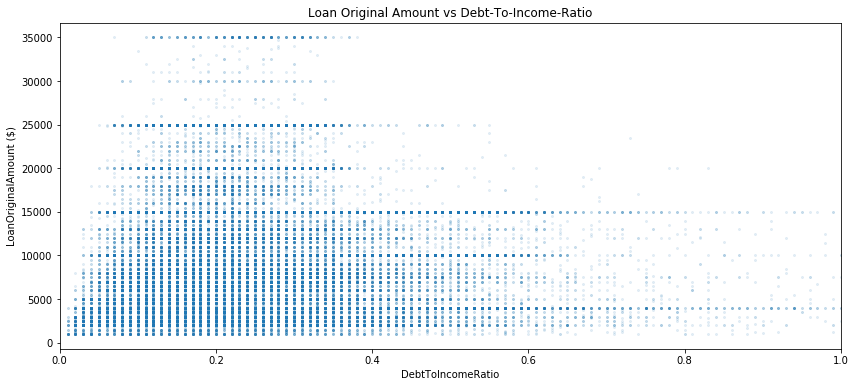

In [235]:
# investigating further with x-axis limit
plt.figure(figsize = [14,6])
plt.scatter(data = loans_clean, x = 'DebtToIncomeRatio', y = 'LoanOriginalAmount', alpha = 1/10, s = 4)
plt.title('Loan Original Amount vs Debt-To-Income-Ratio')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlim(0,1)
plt.show();

Observation: High loan amounts are issued out when there's low debt income ratio (< 0.36). This implies, the lower the debt to income ratio, the higher the loan original amount.

### Question 18

Let's look at the relationship between loan orginal amount and loan status

### Visualization

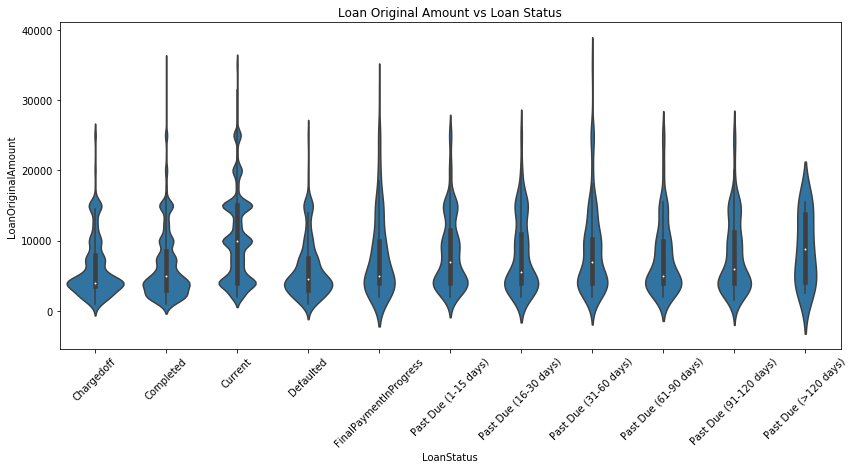

In [236]:
# violin plot of loan original amount vs loan status
plt.figure(figsize = [14,6])
sb.violinplot(data = loans_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color)
plt.title('Loan Original Amount vs Loan Status')
plt.xlabel('LoanStatus')
plt.ylabel('LoanOriginalAmount')
plt.xticks(rotation = 45)
plt.show();

Observation: An average loan amounts of 5,000 are completed while average loan amounts of 10,000 are current.

### Question 19

Let's look at the relationship between monthly loan payment and stated monthly income.

### Visualization

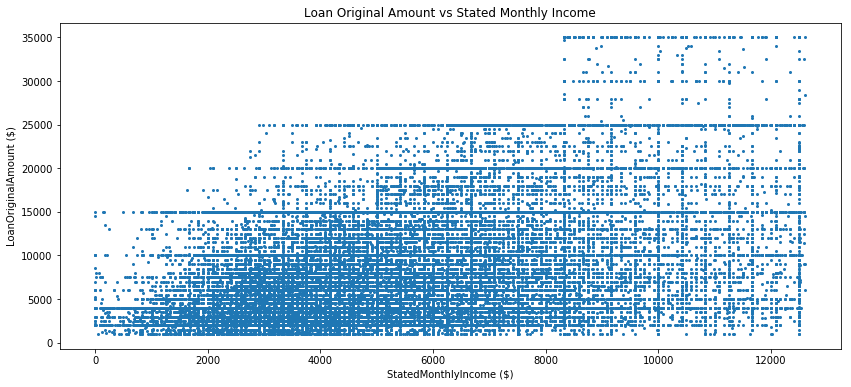

In [253]:
# scatter plot of monthly loan payment vs stated monthly income
plt.figure(figsize = [14,6])
plt.scatter(data = loans_clean, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', s= 4)
plt.title('Loan Original Amount vs Stated Monthly Income')
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('LoanOriginalAmount ($)')
plt.show();

In [ ]:
Observation: Borrowers with higher monthly income tend to get high loans.

### Question 20

Let's look at the relationship between monthly loan payment and stated monthly income.

### Visualization

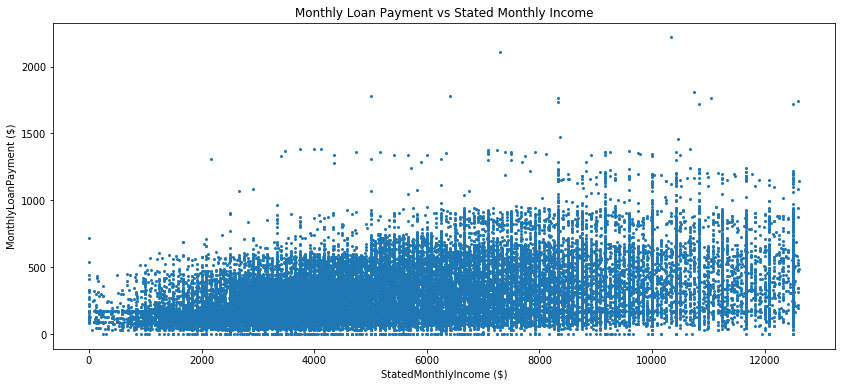

In [237]:
# scatter plot of monthly loan payment vs stated monthly income
plt.figure(figsize = [14,6])
plt.scatter(data = loans_clean, x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment', s= 4)
plt.title('Monthly Loan Payment vs Stated Monthly Income')
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('MonthlyLoanPayment ($)')
plt.show();

Observation: There's a weak postive relationship between them.

### Question 21

Let's look at the relationship between monthly loan payment and income range

### Visualization

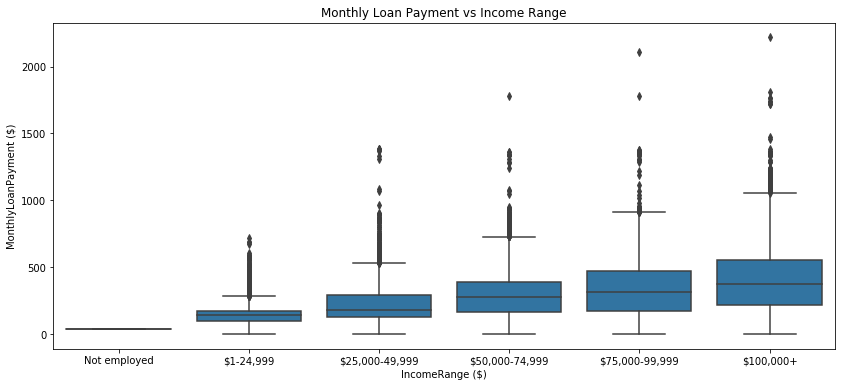

In [238]:
plt.figure(figsize = [14,6])
sb.boxplot(data = loans_clean, x = 'IncomeRange', y = 'MonthlyLoanPayment', color = base_color)
plt.title('Monthly Loan Payment vs Income Range')
plt.xlabel('IncomeRange ($)')
plt.ylabel('MonthlyLoanPayment ($)')
plt.show();

Observation: They tend to be increase in average monthly loan payment across all income range.

### Question 22

Let's look at the relationship between loan original payment and is borrower home owner

### Visualization

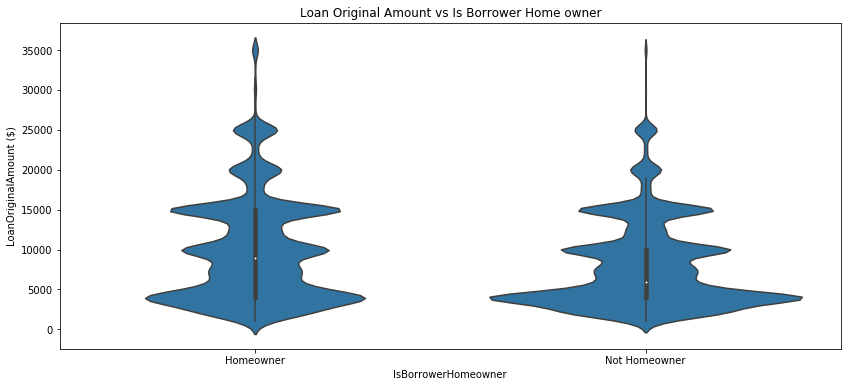

In [240]:
plt.figure(figsize = [14,6])
sb.violinplot(data = loans_clean, x = 'IsBorrowerHomeowner', y = 'LoanOriginalAmount', color = base_color)
plt.title('Loan Original Amount vs Is Borrower Home owner')
plt.xlabel('IsBorrowerHomeowner')
plt.ylabel('LoanOriginalAmount ($)')
plt.show();

Observation: Higher average of loan amounts for home owners.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Loan Orginal Amount had a strong postive relatiionship with monthly loan payment. There was a weak postive relationship between MonthlyLoanPayment and StatedMonthlyIncome. There was also a weak negative relationship between DebtToIncomeRatio and LoanOrginalAmount. It was also observed that high loan amount are given out when there's low debt to income ratio ( < 0.36).

> There was an interesting relationship observed loan orginal amount and the categorical features. The average loan orginal amounts tend to increase yearly. Highest income range tend to have the highest average loan orginal amount and monthly loan payment.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was an unexpected relationship between monthly income payment and stated monthly income. A weak postive correlation was observed between them. A weak correlation was observed between the employment status duration and stated monthly income. but neither of these variables show a strong correlation with loan orginal amount. Prosper score of 11 (best risk score) appear to have fewer loans across the years.

## Multivariate Exploration

In this section, explorations will be performed on three or more variables to determined their relationships.

### Question 23

The main thing I want to explore in this part of the analysis is how some the categorical variables play into the relationship between loan orginal amount and monthly loan payment.

### Visualization

In [241]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans_clean.MonthlyLoanPayment.max()+200, 200)
    bins_y = np.arange(0, loans_clean.LoanOriginalAmount.max()+1000, 1000)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

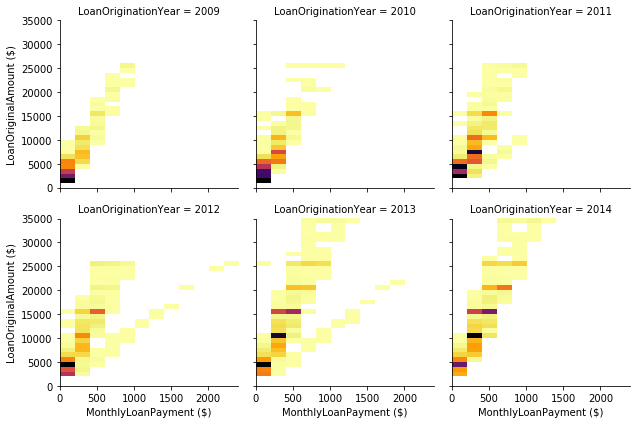

In [242]:
# create faceted heat maps on levels of the loan origination year variable
g = sb.FacetGrid(data = loans_clean, col = 'LoanOriginationYear', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'MonthlyLoanPayment', 'LoanOriginalAmount', color = 'inferno_r')
g.set_xlabels('MonthlyLoanPayment ($)')
g.set_ylabels('LoanOriginalAmount ($)')

plt.show()

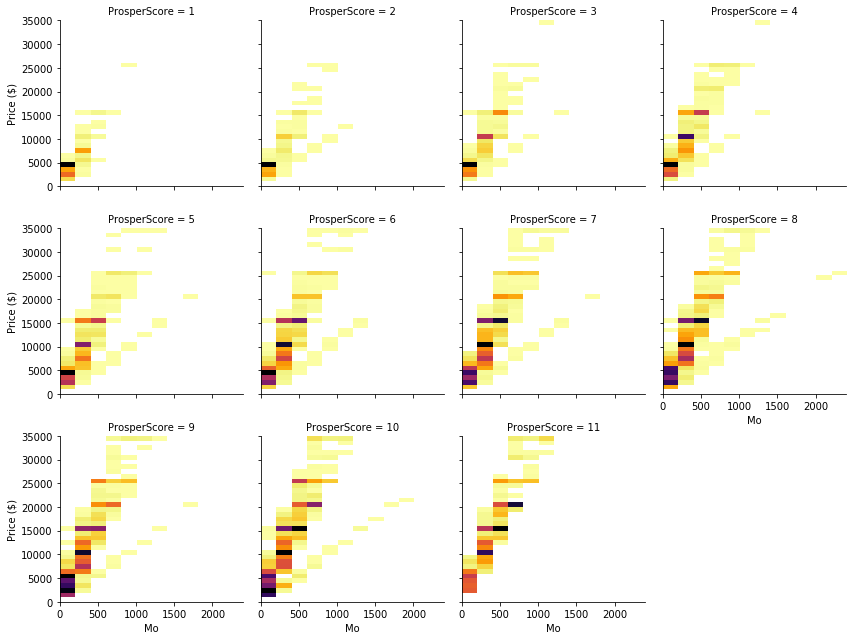

In [79]:
# create faceted heat maps on levels of the prosper score variable
g = sb.FacetGrid(data = loans_clean, col = 'ProsperScore', col_wrap = 4, size = 3)
g.map(hist2dgrid, 'MonthlyLoanPayment', 'LoanOriginalAmount', color = 'inferno_r')
g.set_xlabels('Mo')
g.set_ylabels('Price ($)')

plt.show()

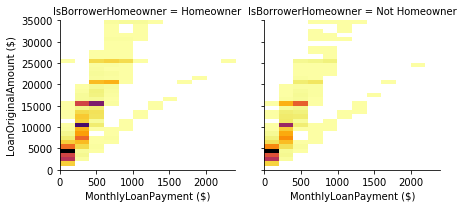

In [245]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = loans_clean, col = 'IsBorrowerHomeowner', col_wrap = 4, size = 3)
g.map(hist2dgrid, 'MonthlyLoanPayment', 'LoanOriginalAmount', color = 'inferno_r')
g.set_xlabels('MonthlyLoanPayment ($)')
g.set_ylabels('LoanOriginalAmount ($)')

plt.show()

Observation: In each of the faceted heat maps, you can see the relationship of quality level against loan original amount and mpnthly payment loan. As the quality level increases, the loan amounts increases with the monthly loan payments. This is clearest in the prosper score plot.

### Question 24

Let's look at how the debt ratio income loans across prosper score and loan originatoon year

### Visualization

In [246]:
# select debt to income ratio of approximately 1 ratio
loans_ratio = loans_clean[(loans_clean.DebtToIncomeRatio  > 0.1 ) & (loans_clean.DebtToIncomeRatio  <= 1 )]

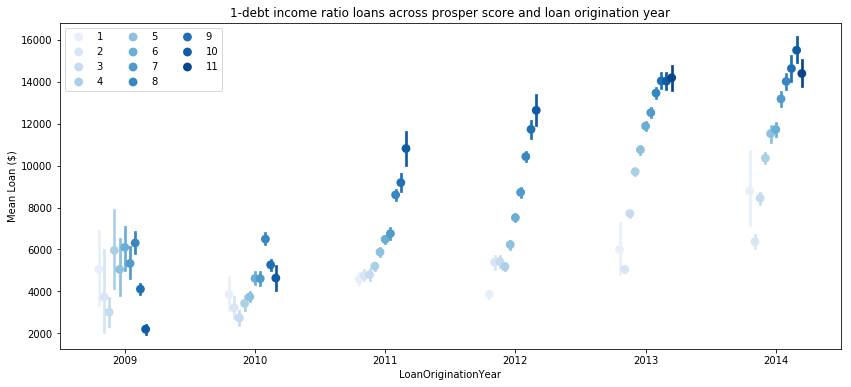

In [247]:
# plot a scatter based on the selected debt to income ratio
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = loans_ratio, x = 'LoanOriginationYear', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('1-debt income ratio loans across prosper score and loan origination year')
plt.ylabel('Mean Loan ($)')
plt.legend(ncol = 3)
plt.show();

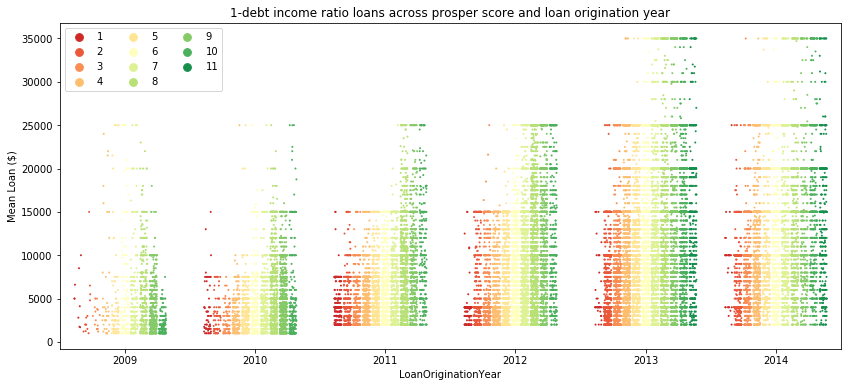

In [248]:
# plot a scatter based on the selected debt to income ratio
fig = plt.figure(figsize = [14,6])
ax = sb.stripplot(data = loans_ratio, x = 'LoanOriginationYear', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'RdYlGn', size =2, jitter = 0.3, dodge = True)
plt.title('1-debt income ratio loans across prosper score and loan origination year')
plt.ylabel('Mean Loan ($)')
plt.legend(ncol = 3)
plt.show();

Observation: They are less debt to income ratio in 2009 with lower loans and high debt to income ratio in 2014 with higher loans. There is also increase in high quality level of prosper score and loans across the year. 

### Question 25

Let's look at the relationship between loan original amount and monthly loan payment via the term.

### Visualization

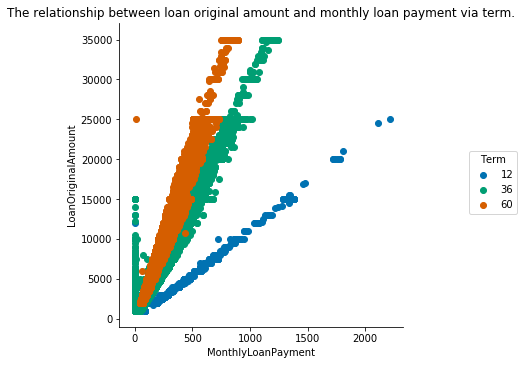

In [83]:
# plotting a facetgrid plot

plt.figure(figsize = [8,5])
g = sb.FacetGrid(data = loans_clean, hue = 'Term', size = 5, palette = 'colorblind')
g.map(plt.scatter, 'MonthlyLoanPayment','LoanOriginalAmount')
plt.title('The relationship between loan original amount and monthly loan payment via term.')
g.add_legend()
plt.show();

Observation: There is increase in loan original amount and monthly loan payment across the terms.

In [254]:
# saving the exploration data to a csv file
loans_clean.to_csv('LoanData.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I investigated more in the relationship between loan original amount and monthly loan payment by looking at the correlation of some the categorical features. The exploration showed that there is a postive effect of increased quality prosper score on loans original amount and monthly loan payment.

### Were there any interesting or surprising interactions between features?

> For the point plot, debt-to-income-ratio at maximum 1 was investigated on loan amount against loan year via prosper score. There was increased in high quality level of prosper score and loans across the year. This implies more loans were issued out on a low debt-to-income-ratio. An interesting interaction was observed between loans amount and monthly loan payment via term, there was increased in loan original amount and monthly loan payment across the terms. 

## Conclusions

> After data wrangling and exploration analysis:

- The loan original amount distribution is trimodal, with one peak at 5000, second peak at 10000, and third peak at 15000.

- In Stated Monthly Income, there was outliers in the data which was filter out. After removing the outliers, they are high spikes in frequency at 4000, 4500, 5000 stated monthly income. 

- In Employment Status: Employed people tend to get the most loans compared to other categories.

- More loans are given in 36 term (3years). Over 60% of loans given to borrower are home owner. most of the loans are still on current status. 2013 is the year with the most frequency of loans.

- High loan amounts are issued out when there's low debt income ratio (< 0.36). The lower the debt to income ratio, the higher the loan original amount.

- Most loans are collected based on debt consolidation which was more than other listing category. This implies that most borrowers collect loans to pay up their debts.

- I found that was a strong relationship between the loan original amount and income range, higher the income range the higher the loan amount given.

- There was a strong postive correlation between loan original amount and monthly loan payment

- There was a strong postive correlation between loan original amount and monthly loan payment, here was a weak postive correlation between loan orginal amount and stated monthly income. People with lower monthly income tend to get high loans.

- I found that they was some postive relationship between the categorical variables (income range, prosper score, loan orgination year, is borrower home owner and the numerical variables (loan original amount and monthly loan payment. The average loan original amounts and monthly loan payment increased yearly. Highest income range tend to have the highest average loan orginal amount and monthly loan payment.

- After visualizing the relationship between some categorical features (prosper score, loan orgination year, is borrower home owner): There is increase in homeowner and not homeowner loans through the years (2009 - 2013). 

- There was a weak postive correlation between loan orginal amount and stated monthly income but borrowers with high monthly income tend to get high loans.

- There was increased in average monthly loan payment across all income range.

- They are less debt to income ratio in 2009 with lower loans and high debt to income ratio in 2014 with higher loans. There is also increase in high quality level of prosper score and loans across the year. 

- There was increased in loan original amount and monthly loan payment across the terms.

In [255]:
# save as a html file
from subprocess import call
call(['python', '-m', 'nbconvert', 'ProsperLoanData_exploration.ipynb'])

0